<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/FORECASTING_DATA_DRIVEN_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libs :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holt's 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

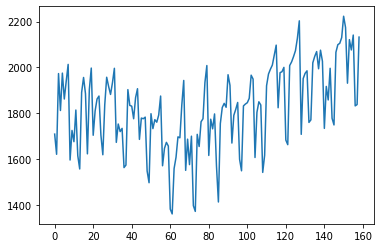

In [2]:
# Load the dataset :

Walmart = pd.read_csv("/content/footfalls.csv")
Walmart.Footfalls.plot()

### **Split the dataset :**

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

### **Moving Average :**

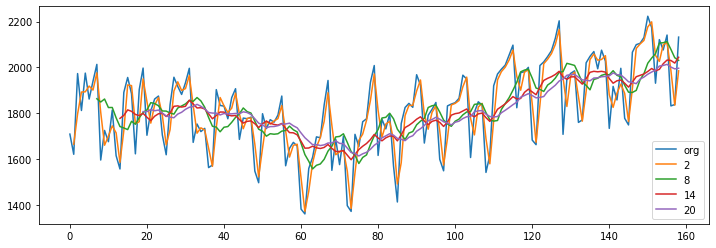

In [4]:
plt.figure(figsize = (12,4))
Walmart.Footfalls.plot(label = "org")
for i in range(2,24,6) : # "i" being the window size
  Walmart["Footfalls"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = "best")
# more the window size more is the smoothing and gradually becoming a line plot

### **Time Series Decomposition Plot :**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


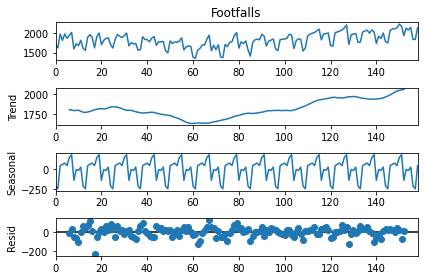

In [5]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls, freq = 12)
decompose_ts_add.plot()
plt.show()

### **ACF - PACF Plots :**

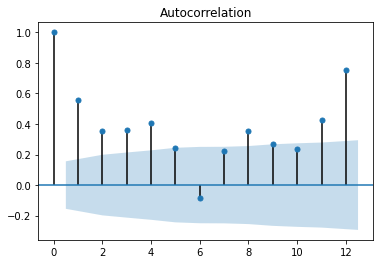

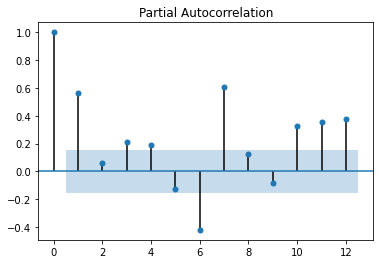

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls, lags = 12)
tsa_plots.plot_pacf(Walmart.Footfalls, lags = 12)
plt.show()

### **Evaluation Metric MAPE :**

In [8]:
def MAPE(pred,org) :
  temp = np.abs((pred - org)/org)*100
  return np.mean(temp)

### **Simple Exponential Method :**

In [10]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.Footfalls)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


8.490637057828364

### **Holt Method :**

In [11]:
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.Footfalls)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """Entry point for launching an IPython kernel.


7.546249229496066

### **Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :**

In [12]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"], seasonal = "add", trend = "add", seasonal_periods = 12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.Footfalls) 

2.6748196958856236

### **Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :**

In [13]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.Footfalls)

4.238666032273202

### **Final Model by Combining Train and Test :**

In [14]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

In [15]:
# Forecasting for next 10 Time Periods :

hwe_model_add_add.forecast(10)

159    2152.457473
160    2165.602422
161    2162.802663
162    2247.700393
163    2244.034122
164    1952.378271
165    2142.193951
166    2117.779535
167    2183.834006
168    1909.820546
dtype: float64